In [5]:
import pandas as pd
import numpy as np

df_salary = pd.read_csv('MBA_Salary.csv')

print(df_salary.head())
# Print a line Break
print("\n" + "-" * 50 + "\n")
print(df_salary.info())
print("\n" + "-" * 50 + "\n")
print(df_salary.describe())




   S. No.  Percentage in Grade 10  Salary
0       1                   62.00  270000
1       2                   76.33  200000
2       3                   72.00  240000
3       4                   60.00  250000
4       5                   61.00  180000

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S. No.                  50 non-null     int64  
 1   Percentage in Grade 10  50 non-null     float64
 2   Salary                  50 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 1.3 KB
None

--------------------------------------------------

         S. No.  Percentage in Grade 10         Salary
count  50.00000               50.000000      50.000000
mean   25.50000               63.922400  258192.000000
std    14.57738                9.859937   76715.790993


In [14]:
import statsmodels.api as sm
# Define the dependent variable (Y) and independent variables (X)
Y = df_salary['Salary']
X = sm.add_constant(df_salary['Percentage in Grade 10'])

print(X.head())
print(Y.head())


   const  Percentage in Grade 10
0    1.0                   62.00
1    1.0                   76.33
2    1.0                   72.00
3    1.0                   60.00
4    1.0                   61.00
0    270000
1    200000
2    240000
3    250000
4    180000
Name: Salary, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='Percentage in Grade 10', ylabel='Salary'>

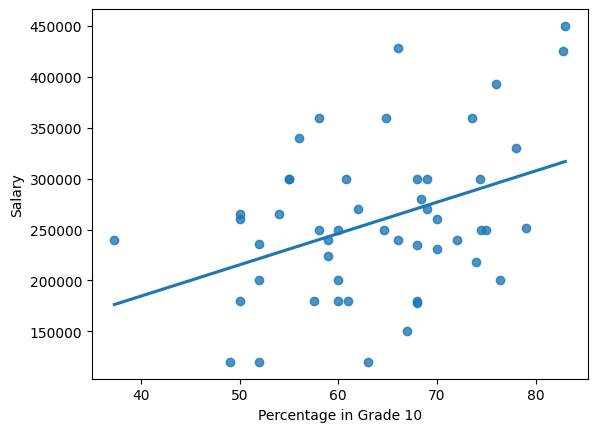

In [12]:
sns.regplot(x='Percentage in Grade 10', 
            y='Salary', 
            data=df_salary, 
            ci=0)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=100)


In [21]:
# Fitting the model
salary_lm = sm.OLS(Y_train, X_train).fit()

# Print the summary of the model
#print(salary_lm.summary())

# Print estimated parameters
# print("\nEstimated Parameters:")
#print(salary_lm.params)


# Print summary2    
print("\nSummary2:")
print(salary_lm.summary2())


Summary2:
                          Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-06-16 09:03      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percent

In [32]:
from scipy.stats import zscore
df_salary['zscore'] = zscore(df_salary['Salary'])
# Print the first few rows of the DataFrame with z-scores
print("\nZ-scores of Salary:")
print(df_salary[(df_salary.zscore > 3.0) | (df_salary.zscore < -3.0)])


Z-scores of Salary:
Empty DataFrame
Columns: [S. No., Percentage in Grade 10, Salary, zscore]
Index: []
